## Convert videos to images

In [3]:
import os
os.getcwd()
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
subfolders


['1min', '5min']

In [2]:
import glob
import os
import cv2
substring_geo='Geo'
substring_paen='Paen'
substring_acid='Acid'
excel_string='.xlsx'
folders = ['Geobacter/GS80PL20Z20/']
#,'Geobacter/GS40PL10Z20/', 'Paenibacellus/GS80PL10Z20/', 'Paenibacellus/GS80PL20Z20/',
#          'Paenibacellus/GS80PL20Z10/', 'Paenibacellus/GS40PL20Z20/', 'Paenibacellus/GS40PL10Z20/', 'Geobacter/GS80PL10Z20/','Geobacter/GS40PL20Z20/',
#          'Geobacter/GS80PL20Z10/','Acidovorax/GS40PL10Z20/','Acidovorax/GS40PL20Z20/','Acidovorax/GS80PL10Z20/','Acidovorax/GS80PL20Z20/',
#          'Acidovorax/GS80PL20Z10/'
n=0
n_acid=28
n_paen=31
n_geo=27
no_flow=1

for folder in folders:
    if no_flow == 1:
        if substring_geo in folder:
            n=n_geo
        elif substring_paen in folder:
            n=n_paen
        elif substring_acid in folder:
            n=n_acid
        else:
            print ('There is a bacteria in the data that is unaccounted for')
        os.chdir('E:/')
        subfolders=os.listdir(folder)
        for subfolder in subfolders:
            os.chdir('E:/')
            if excel_string in subfolder:
                break
            files=glob.glob(folder+subfolder+'/*25fps*.avi')
            os.chdir('E:/'+folder+subfolder) 
            for file in files:
                print ('Saving images for ' + str(file))
                partial=0
                vidcap=cv2.VideoCapture(file[n:])
                try:
                    os.makedirs('D:/'+file[0:-4]+'_frames')
                except:
                    if len(os.listdir(file[0:-4]+'_frames'))>0:
                        partial = 1
                os.chdir('D:/'+file[0:-4]+'_frames')
                success,image = vidcap.read()
                if partial == 0:
                    count = 0
                else:
                    count = len(os.listdir())  
                while success:
                    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
                    success,image = vidcap.read()
                    #print('Read a new frame: ', success)
                    count += 1
                os.chdir('E:/'+folder+subfolder)
                

            
    else:
        n_acid=23
        n_paen=26
        n_geo=22
        os.chdir('E:/Flow/')
        files=glob.glob(folder+'*1x1y_5min*.avi')
        os.chdir(folder) 
        for file in files:
            print ('Saving images for ' + str(file))
            if substring_geo in file:
                n=n_geo
            elif substring_paen in file:
                n=n_paen
            elif substring_acid in file:
                n=n_acid
            else:
                print ('There is a bacteria in the data that is unaccounted for')
            partial=0
            vidcap=cv2.VideoCapture(file[n:])
            try:
                os.makedirs(file[n:-4]+'_frames')
            except:
                if len(os.listdir(file[n:-4]+'_frames'))>0:
                    partial = 1
            os.chdir(file[n:-4]+'_frames')
            success,image = vidcap.read()
            if partial == 0:
                count = 0
            else:
                count = len(os.listdir())  
            while success:
                cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
                success,image = vidcap.read()
                #print('Read a new frame: ', success)
                count += 1
            os.chdir(os.path.dirname(os.getcwd()))


Saving images for Geobacter/GS80PL20Z20/1min\01xx_10X_25fps_1min_001.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_10X_25fps_1min_002.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_10X_25fps_1min_003.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_20X_25fps_1min_001.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_20X_25fps_1min_002.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_20X_25fps_1min_003.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_20X_25fps_1min_004.avi
Saving images for Geobacter/GS80PL20Z20/1min\01xx_20X_25fps_1min_005.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_10X_25fps_5min_001.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_10X_25fps_5min_002.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_10X_25fps_5min_003.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_20X_25fps_5min_001.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_20X_25fps_5min_002.avi
Saving images for Geobacter/GS80PL20Z20/5min\01xx_2

## Particle Tracking with Trackpy

Frame 3437: 135 trajectories present.


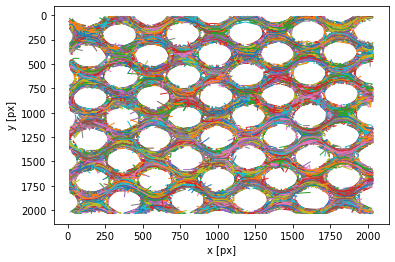

In [89]:
#Not working very well, since each dataset requires different parameters. Probably best to just use Trackmate.
#!pip install trackpy
#!pip install pims
#!pip install statsmodels
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pims
import trackpy as tp
import os

import matplotlib  as mpl 
import matplotlib.pyplot as plt 
import glob
import os
import cv2
folders = ['Acidovorax/GS80PL20Z20/','Acidovorax/GS40PL20Z20/','Acidovorax/GS40PL10Z20/','Geobacter/GS80PL20Z20/','Paenibacillus/GS80PL20Z20/' ]
#folders = ['Acidovorax','Geobacter','Paenibacillus' ]
os.chdir('C:/Users/marcb/Desktop/matlab_bgs/')
count = 0
#Substrings used to change Trackpy parameters based on video file name
substring_1ulh='1ulh'
substring_5ulh='5ulh'
substring_geo='Geo'
substring_paen='Paen'
substring4010='GS40PL10'
substring4020='GS40PL20'
substring8020='GS80PL20'
substring1='001'
substring2='002'
substring3='003'
substring4='004'
substring5='005'

for folder in folders:
    if substring_geo in folder:
        count = 1
    if substring_paen in folder:
        count = 2
    sub_folders=os.listdir(folder)
    for sub_folder in sub_folders:
        print ('Working on ' + str(folder) +'/' +str(sub_folder))
        
        #Parameters for Acidovorax
        if count == 0:
            diameter = 31
            if substring_1ulh in sub_folder:
                if substring4010 in folder:
                    maxdist = 45
                    nspots = 8
                elif substring4020 in folder:
                    nspots = 8
                    if substring1 in sub_folder:
                        maxdist = 32
                    elif substring2 in sub_folder:
                        maxdist = 25
                    elif substring3 in sub_folder:
                        maxdist = 14
                    else:
                        maxdist = 22
                        print ('The dataset currently being worked on does not have specified parameters. Using general parameters...')                        
                elif substring8020 in folder:
                    nspots = 8
                    if substring1 in sub_folder:
                        maxdist = 18
                    elif substring2 in sub_folder:
                        maxdist = 15
                    elif substring5 in sub_folder:
                        maxdist = 35
                    else:
                        maxdist = 30
                        print ('The dataset currently being worked on does not have specified parameters. Using general parameters...')
            if substring_5ulh in sub_folder:
                if substring4010 in folder:
                    nspots = 6
                    maxdist = 65
                elif substring4020 in folder:
                    nspots = 10
                    maxdist = 10
                elif substring8020 in folder:
                    nspots = 6
                    if substring1 in sub_folder:
                        maxdist = 80
                    elif substring2 in sub_folder:
                        maxdist = 60
                    elif substring5 in sub_folder:
                        maxdist = 100
                    else:
                        maxdist = 80
                        print ('The dataset currently being worked on does not have specified parameters. Using general parameters...')
         
         #Parameters for Geobacter
        elif count == 1:
            diameter = 31
            if substring_1ulh in sub_folder:
                nspots = 10
                if substring1 in sub_folder:
                    maxdist = 30
                elif substring2 in sub_folder:
                    maxdist = 40
                else:
                    maxdist = 35
                    print ('The dataset currently being worked on does not have specified parameters. Using general parameters...')
            if substring_5ulh in sub_folder:
                nspots = 6
                maxdist = 90
                
        #Parameters for Paenibacillus
        elif count == 2:
            diameter = 51
            if substring_1ulh in sub_folder:
                nspots = 6
                maxdist = 20
            if substring_5ulh in sub_folder:
                nspots = 6
                if substring1 in sub_folder:
                    maxdist = 30 
                elif substring2 in sub_folder:
                    maxdist = 35
                elif substring3 in sub_folder:
                    maxdist = 45
                else:
                    maxdist = 35
                    print ('The dataset currently being worked on does not have specified parameters. Using general parameters...')
    
        os.chdir(os.path.join(folder,sub_folder))
        frames= pims.as_grey(pims.open('frame*.jpg'))
        f_locate = tp.locate(frames[0], diameter, minmass=0, max_iterations=5, noise_size=1,separation=25, invert=False)
        mm=np.median(f_locate.mass)
        f=tp.batch(frames, diameter, minmass=mm, max_iterations=5, noise_size=1, separation=25, invert=False)
        #We will need to figure out filters that work for everything
        f1= f[((f['ecc']<3*np.median(f['ecc']))&(f['signal']>1.5*np.median(f['signal'])))]
        pred = tp.predict.NearestVelocityPredict()
        t = pred.link_df(f1, maxdist, memory=5, adaptive_stop=1,adaptive_step=.9)
        t1 = tp.filter_stubs(t, nspots)
        os.chdir('C:/Users/marcb/Desktop/flow_trajectories/')
        os.makedirs(os.path.join(folder,sub_folder))
        os.chdir(os.path.join(folder,sub_folder))
        t1.to_csv('trajectories.csv')
        # Calculate and output statistics
        a=tp.plot_traj(t1)
        traj_fig=a.figure
        traj_fig.savefig('C:/Users/marcb/Downloads/TP_output.jpg')
        frame_list=[]
        velocity_array=[]
        C=[]
        unique_part=[]
        for i in t1.particle.unique():
            unique_part.append(i)
        unique_part = [x for x in unique_part if str(x) != 'nan']
        traj_stats=[]
        dist=[]
        count=0
        for n in range(len(unique_part)):
            tslice=t1.particle==unique_part[n]
            traj_x=t1.x[tslice]
            traj_y=t1.y[tslice]
            frame=t1.frame[tslice]
            frame_diff=frame.diff()
            x_diff=traj_x.diff()
            y_diff=traj_y.diff()
            vel_dist=np.sqrt(x_diff**2+y_diff**2)
            displacement=np.sqrt((traj_x.iloc[0]-traj_x.iloc[-1])**2+(traj_y.iloc[0]-traj_y.iloc[-1])**2)
            vel_dist.index=frame_diff.index
            velocity=vel_dist/frame_diff
            velocity_array.append(velocity) 
            angles=np.zeros((len(x_diff),1))
            for i in range(len(x_diff)-1):
                theta_1=np.arctan(y_diff.iloc[i]/x_diff.iloc[i])
                theta_2=np.arctan(y_diff.iloc[i+1]/x_diff.iloc[i+1])
                angles[i]=(theta_2-theta_1)*(180/np.pi)
            traj_stats.append([n, angles])
        new_velocity_array=[]
        for i in velocity_array:
            section=np.array(i[:])
            new_velocity_array=np.hstack([section,new_velocity_array])    
        angle_array=[]
        for i in range(len(traj_stats)):
            section=traj_stats[i][1]
            section=np.reshape(section,(len(section),))
            angle_array=np.hstack([section,angle_array])
        micron_velocity=new_velocity_array*.325
#         em=tp.emsd(t1,.325,10)
#         em.to
        pd.DataFrame(micron_velocity).to_csv('speeds.csv')
        pd.DataFrame(angle_array).to_csv('angles.csv')
        os.chdir('C:/Users/marcb/Desktop/matlab_bgs/')
    
    



In [354]:
#Trackmate turning angle calculation
import statsmodels.api as sm
import numpy as np
import pandas as pd
#import pims
#import trackpy as tp
import os

import matplotlib  as mpl 
import matplotlib.pyplot as plt 
import glob
import os
import cv2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
directory='C:/Users/marcb/Desktop/trackmate_bgs/sim_trajectories'
substring='z'
os.chdir('C:/Users/marcb/Desktop/flow_trajectories/tmate_angles')
for filename in os.listdir(directory):
    if substring in filename:
        print ('Working on ' + str(filename))
        timename=filename[:-15]+'_time.xlsx'
        t1 = pd.read_csv(os.path.join(directory,filename),header=3,usecols=[2,4,5,7],names=['particle','x','y','frame'])
        time=pd.read_excel(os.path.join(directory,timename), usecols=[1])
        dt=[]
        time.dropna(inplace=True)
        for count, value in enumerate (time.iloc):
            dt.append(time.iloc[count+1][0]-time.iloc[count][0])
            if (count+2)==len(time):
                break
            if dt[count]<0:
                print ('Time file is erroneous. T[0] = time.iloc[403]', count)
                time.drop(time.index[0:count+1], inplace=True)
                time.reset_index(drop=True, inplace=True)
            else:
                continue
        unique_part=[]
        for i in t1.particle.unique():
            unique_part.append(i)
        unique_part = [x for x in unique_part if str(x) != 'nan']
        traj_stats=[]
        dist=[]
        count=0
        for n in range(len(unique_part)):
            tslice=t1.particle==unique_part[n]
            traj_x=t1[tslice].sort_values(['frame']).x
            traj_y=t1[tslice].sort_values(['frame']).y
            frame=t1[tslice].sort_values(['frame']).frame
            if np.any(frame>len(time)):
                break
            start_ind=time.index[int(frame.iloc[0])]
            current_time=time.iloc[start_ind:start_ind+len(frame)]
            dt=current_time.diff()
            #frame_diff=frame.diff()
            x_diff=traj_x.diff()
            y_diff=traj_y.diff()
            vel_dist=np.sqrt(x_diff**2+y_diff**2)
            vel=np.reshape(vel_dist.values,[len(vel_dist),1])/np.reshape(np.array(dt),[len(vel_dist),1])
 
            angles=np.zeros((len(x_diff),1))
            for i in range(len(x_diff)-1):
                theta_1=np.arctan(y_diff.iloc[i]/x_diff.iloc[i])
                theta_2=np.arctan(y_diff.iloc[i+1]/x_diff.iloc[i+1])
                angles[i]=(theta_2-theta_1)*(180/np.pi)
            #    if angles[i]==0:
            #        angles[i]=np.nan
            #        vel[i]=np.nan
            #    if i==len(x_diff)-1:
            #        vel[i]=np.nan
            #angles[i+1]=np.nan
            for count, val in enumerate (angles):
                if val==0:
                    angles[count]=np.nan
            vel=vel[0:len(angles)]
                    
            traj_stats.append([n, angles,vel])

        angle_array=[]
        vel_array=[]
        for i in range(len(traj_stats)):
            section1=traj_stats[i][1]
            section1=np.reshape(section1,(len(section1),))
            section2=traj_stats[i][2]
            section2=np.reshape(section2,(len(section2),))
            angle_array=np.hstack([section1,angle_array])
            vel_array=np.hstack([section2,vel_array])
            final_array=np.vstack([np.transpose(angle_array)[0:len(vel_array)],np.transpose(vel_array)])

        pd.DataFrame(np.transpose(final_array)).to_csv('vel'+str(filename))

    
    


Working on acid_401020_1ulh_001_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_401020_1ulh_002_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_401020_1ulh_003_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_401020_5ulh_001_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_401020_5ulh_002_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_401020_5ulh_003_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_402020_1ulh_001_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_402020_1ulh_002_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_402020_1ulh_003_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_402020_5ulh_001_5framebgsz.csv
Time file is erroneous. T[0] = time.iloc[403] 402
Working on acid_402020_5ulh_00

In [33]:
#Trackmate, trackpy, unil and sim vel and turning angle calculation
import statsmodels.api as sm
import numpy as np
import pandas as pd
#import pims
#import trackpy as tp
import os

import matplotlib  as mpl 
import matplotlib.pyplot as plt 
import glob
import os
import cv2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
directory='C:/Users/marcb/Desktop/trackmate_bgs/sim_trajectories'
substring='z'
subc='xc'
suby='yc'
os.chdir('C:/Users/marcb/Desktop/flow_trajectories/tmate_angles')
for filename in os.listdir(directory):
    if substring in filename:
        print ('Working on ' + str(filename))
        if subc in filename:
            traj_stats=[]
            xc = pd.read_csv(os.path.join(directory,filename),header=None)
            new_fname='yc'+filename[2:]
            yc = pd.read_csv(os.path.join(directory,new_fname),header=None)
            xc[xc==0]=np.nan
            yc[yc==0]=np.nan
            frame_diff = 1
            for n in range(xc.shape[1]):
                x_diff = xc[n].diff()
                y_diff = yc[n].diff()
                vel=np.sqrt(x_diff**2+y_diff**2)
                angles=np.zeros((len(x_diff),1))
                for i in range(len(x_diff)-1):
                    theta_1=np.arctan(y_diff.iloc[i]/x_diff.iloc[i])
                    theta_2=np.arctan(y_diff.iloc[i+1]/x_diff.iloc[i+1])
                    angles[i]=(theta_2-theta_1)*(180/np.pi)

                for count, val in enumerate (angles):
                    if val==0:
                        angles[count]=np.nan
                vel=vel[0:len(angles)]

                traj_stats.append([n, angles,vel])
            angle_array=[]
            vel_array=[]
            for i in range(len(traj_stats)):
                section1=traj_stats[i][1]
                section1=np.reshape(section1,(len(section1),))
                section2=traj_stats[i][2]
                section2=np.reshape(section2,(len(section2),))
                angle_array=np.hstack([section1,angle_array])
                vel_array=np.hstack([section2,vel_array])
                final_array=np.vstack([np.transpose(angle_array)[0:len(vel_array)],np.transpose(vel_array)])

            pd.DataFrame(np.transpose(final_array)).to_csv('vel'+str(filename))
        elif suby in filename:
            break         
        else:
            #if 'TM' in filename:
                
            t1 = pd.read_csv(os.path.join(directory,filename))
            unique_part=[]
            for i in t1.particle.unique():
                unique_part.append(i)
            unique_part = [x for x in unique_part if str(x) != 'nan']
            traj_stats=[]
            dist=[]
            count=0
            for n in range(len(unique_part)):
                tslice=t1.particle==unique_part[n]
                traj_x=t1[tslice].sort_values(['frame']).x
                traj_y=t1[tslice].sort_values(['frame']).y
                frame=t1[tslice].sort_values(['frame']).frame
                frame_diff=frame.diff()
                x_diff=traj_x.diff()
                y_diff=traj_y.diff()
                vel_dist=np.sqrt(x_diff**2+y_diff**2)
                vel=np.reshape(vel_dist.values,[len(vel_dist),1])/np.reshape(frame_diff.values,[len(vel_dist),1])

                angles=np.zeros((len(x_diff),1))
                for i in range(len(x_diff)-1):
                    theta_1=np.arctan(y_diff.iloc[i]/x_diff.iloc[i])
                    theta_2=np.arctan(y_diff.iloc[i+1]/x_diff.iloc[i+1])
                    angles[i]=(theta_2-theta_1)*(180/np.pi)

                for count, val in enumerate (angles):
                    if val==0:
                        angles[count]=np.nan
                vel=vel[0:len(angles)]

                traj_stats.append([n, angles,vel])

            angle_array=[]
            vel_array=[]
            for i in range(len(traj_stats)):
                section1=traj_stats[i][1]
                section1=np.reshape(section1,(len(section1),))
                section2=traj_stats[i][2]
                section2=np.reshape(section2,(len(section2),))
                angle_array=np.hstack([section1,angle_array])
                vel_array=np.hstack([section2,vel_array])
                final_array=np.vstack([np.transpose(angle_array)[0:len(vel_array)],np.transpose(vel_array)])

            pd.DataFrame(np.transpose(final_array)).to_csv('vel'+str(filename))

    
    


Working on Gaussian_345part_5xspeed_dropped_interp_TP_z.csv
Working on Gaussian_345part_5xspeed_dropped_kalman_interp_TM_z.csv
Working on Gaussian_345part_5xspeed_dropped_kalman_TM_z.csv
Working on Gaussian_345part_5xspeed_kalman_TM_z.csv
Working on Gaussian_345part_5xspeed_TP_z.csv
Working on xc_Gaussian_345part_5xspeedz.csv
Working on xc_Gaussian_345part_5xspeed_droppedz.csv
Working on yc_Gaussian_345part_5xspeedz.csv


In [12]:
xc=pd.read_csv('C:/Users/marcb/Desktop/trackmate_bgs/sim_trajectories/xc_Gaussian_345part_5xspeed.csv',header=None)

In [18]:
xc[xc==0]=np.nan
#yc[yc==0]=np.nan
xc.shape

(497, 475)

In [27]:
xc

,200,200.1,210,210.1,210.2,210.3,200.2,230,220,220.1,...,1780.1,1790.3,1790.4,1810,1800,1800.1,1800.2,1810.1,1800.3,1810.2
0,199.8,204.0,210.9,206.0,213.8,206.0,203.0,228.9,224.7,215.9,...,1783.7,1791.4,1786.8,1811.3,1797.5,1799.1,1802.7,1809.5,1802.2,1808.8
1,199.5,208.3,211.6,202.3,217.6,202.3,206.1,227.9,229.6,212.0,...,1787.2,1792.4,1783.4,1812.3,1794.7,1797.8,1805.1,1808.8,1804.1,1807.3
2,199.2,212.9,212.3,198.7,221.6,198.8,209.2,226.8,234.7,208.2,...,1790.5,1793.1,1780.0,1813.0,1791.6,1796.2,1807.3,1807.7,1805.7,1805.5
3,198.9,217.8,212.9,195.4,225.6,195.6,212.3,225.8,239.9,204.5,...,1793.7,1793.5,1776.3,1813.5,1788.1,1794.3,1809.3,1806.3,1807.0,1803.5
4,198.5,222.9,213.3,192.3,229.7,192.7,215.4,224.7,245.2,201.0,...,1796.7,1793.6,1772.6,1813.6,1784.4,1792.1,1811.0,1804.7,1808.0,1801.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
import trackpy as tp

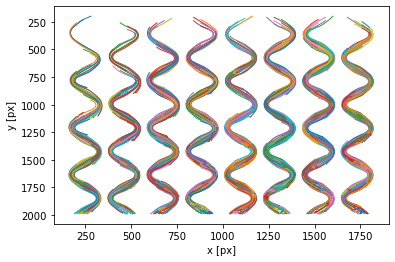

In [35]:
plt.figure()
tp.plot_traj(t1);